In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import pandas as pd
from pandas import DataFrame, Series

In [ ]:
# Example PLOT_FNs: pie, scatter, bar, line
# Series.plot.PLOT_FN(...)
# DataFrame.plot.PLOT_FN(...)

In [6]:
s = Series([5000000, 3000000, 2000000])
s

0    5000000
1    3000000
2    2000000
dtype: int64

In [8]:
%matplotlib inline

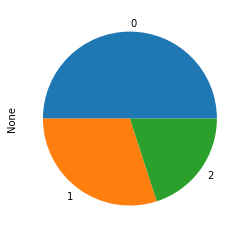

In [9]:
s.plot.pie()

In [47]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 18

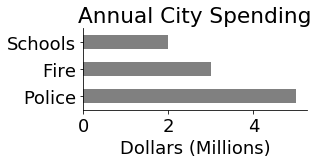

In [46]:
s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})
ax = (s / 1000000).plot.barh(figsize=(4, 1.5), color="0.5")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

Text(0.5, 1.0, 'Annual City Spending')

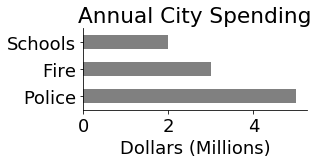

In [55]:
def get_ax(height=3):
    _, ax = plt.subplots(figsize=(4, height))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax

s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})
ax = get_ax(1.5)
(s / 1000000).plot.barh(color="0.5", ax=ax)
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

In [58]:
import sqlite3
import os

In [60]:
path = "bus.db"
assert os.path.exists(path)
conn = sqlite3.connect(path)

In [100]:
pd.read_sql("""
SELECT * FROM sqlite_master
""", conn)

,type,name,tbl_name,rootpage,sql
0,table,boarding,boarding,2,"CREATE TABLE ""boarding"" (\n""index"" INTEGER,\n ..."
1,index,ix_boarding_index,boarding,3,"CREATE INDEX ""ix_boarding_index""ON ""boarding"" ..."
2,table,routes,routes,55,"CREATE TABLE ""routes"" (\n""index"" INTEGER,\n ""..."
3,index,ix_routes_index,routes,57,"CREATE INDEX ""ix_routes_index""ON ""routes"" (""in..."


In [65]:
# what are the top routes, and how many people ride them daily?

In [64]:
pd.read_sql("SELECT * FROM boarding LIMIT 3", conn)

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34


In [77]:
# GUESS top routes: 80, 10, 28, 6, 1, 13
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
""", conn)
df = df.set_index("Route")
df.head()

,daily
Route,
80,10211.79
2,4808.03
6,4537.02
10,4425.23
3,2708.55


In [86]:
s = df["daily"].iloc[:5]
s["other"] = df["daily"].iloc[5:].sum()
s

Route
80       10211.79
2         4808.03
6         4537.02
10        4425.23
3         2708.55
other    29296.56
Name: daily, dtype: float64

Text(0, 0.5, 'Rides/Day (Thousands)')

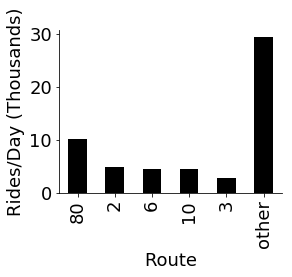

In [92]:
ax = get_ax()
(s/1000).plot.bar(color="k", ax=ax)
ax.set_ylabel("Rides/Day (Thousands)")

In [94]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
df = DataFrame(trees)
df.head()

,age,diameter,height
0,1,0.8,1.5
1,1,1.2,1.9
2,1,1.4,1.8
3,2,0.9,1.8
4,2,1.5,2.5


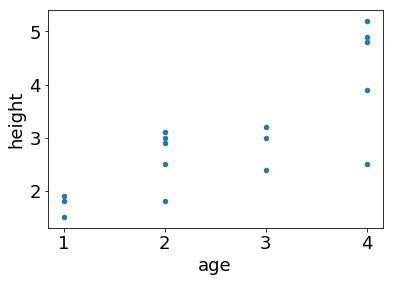

In [97]:
df.plot.scatter(x="age", y="height")